# NumPy and Plotting with Matplotlib

If you have not completed the first notebook in this series (00-Jupyter_Python_Overview), please take some time to review that first. In this notebook, we will move beyond the built-in Python functions and start using Python libraries NumPy for mathematical operations and Matplotlib for plotting some results

## Loading Packages

1) Python packages provide important functions and need to be loaded. Loading packages follows this structure
    
    import package_name as pkg

2) Functions can then be called as
    
    pkg.function()

3) With the NumPy package, we can use functions to perform mathematical operations

Let's begin with loading the numpy package 

In [1]:
import numpy as np # np is the common shorthand for the numpy package

## NumPy Arrays

NumPy arrays

    np.arange(start, stop, step_size)

In [ ]:
x = np.arange(10)

In [ ]:
y = np.arange(0,10,1) # note that x and y are the same
y

In [ ]:
# make an array from 2 to 10 that increments by 2

In [ ]:
a = np.arange(5)
b = np.arange(6,11)
print('a = ', a)
print('b = ', b)
a + b # we can add arrays of the same dimension

In [ ]:
# substract the two arrays above

In [ ]:
a + 5 # we can also add a scalar to every element in the array (often called broadcasting)

In [ ]:
# In general, previous operations work on NumPy arrays (e.g., multiplication, exponentiation)

In [ ]:
# Some np capabilities are introduced below
np.random.seed(0) # sets a random seed for reproducibility
np.random.sample(1) # returns a random float from [0,1) uniform distribution

Reshaping NumPy arrays will be particularly important when you are no longer working with vectors of values and want to work with matrices. This can be done in the following way

    myarray.reshape(dim0,dim1)
   
where dim0 and dim1 provide the new dimension of the array.

In [ ]:
x = np.arange(10).reshape(2,5)
# x was previosly a one-dimensional vector of 10 values. Now what should the dimensions be?

In [ ]:
y = np.reshape(np.arange(10),(2,5))
y

## Profiling and Timing Code

Oftentimes, it will be important to profile and time your code for efficiency. Remember, however, that first to make your code work and then optimize! Timing code running time can be done with the following function
    
    %timeit function # time a repeated execution of a function
    %time function # time execution of a function once
    
You can also profile code on scripts to get a better sense of what part of your function/script takes the most time with the following function

    %prun script

In [3]:
%time sum(range(100))

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 11 µs


4950

In [ ]:
%timeit sum(range(100))

In [22]:
%%time 
## adding another % sign allows for timing of multiple lines of code
mysum = 0
for i in range(10000):
    mysum = mysum + i
    #mysum += i # another way to achieve the same result
print(mysum)

49995000
CPU times: user 1.36 ms, sys: 123 µs, total: 1.48 ms
Wall time: 1.42 ms


In [25]:
# let's profile a short script
def sum_of_lists(N):
    total = 0
    for i in range(N):
        L = np.arange(i,N)
        total += sum(L)
    return total

In [36]:
%prun sum_of_lists(10)
# sum_of_lists(5)

## Universal Functions

NumPy provides several universal functions to allow for vectorized (operations performed on arrays) code. This is generally because of the slowness of loops.

In [60]:
# Let's write a function that takes an an array as input and outputs the absolute value of 
# that array
def my_absolute(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        if values[i] >= 0:
            output[i] = values[i]
        else:
            output[i] = -1*values[i]
    return output

In [62]:
np.random.seed(0) # set the random seed
x = np.random.randn(10)
print(x)
my_absolute(x)

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]


array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        0.97727788,  0.95008842,  0.15135721,  0.10321885,  0.4105985 ])

In [63]:
# let's compare our function with abs()
%timeit my_absolute(np.random.randn(10000))

4.34 ms ± 28 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [64]:
%timeit abs(np.random.randn(10000))

232 µs ± 5.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In fact, the previous actions on arrays were all examples of NumPy's universal function capabilities. Let's see an example on trig functions.

In [65]:
theta = np.linspace(0, np.pi, 3)

print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [ 0.          1.57079633  3.14159265]
sin(theta) =  [  0.00000000e+00   1.00000000e+00   1.22464680e-16]
cos(theta) =  [  1.00000000e+00   6.12323400e-17  -1.00000000e+00]
tan(theta) =  [  0.00000000e+00   1.63312394e+16  -1.22464680e-16]


## Matrix Operations

Variables, just as in mathematics, are placeholders for values assigned to them. Functions, on the other hand, take input (like variables) and output the result of applying certain rules to the input.

In [95]:
# Define two matrices and add them
X = np.arange(4).reshape(2,2)
print('X =', X)
Y = np.arange(-4,0).reshape(2,2)
print('Y =', Y)

X = [[0 1]
 [2 3]]
Y = [[-4 -3]
 [-2 -1]]


In [96]:
# Multiply two matrices, and save as another matrix
np.matmul(X,Y) #vs X*Y

array([[ -2,  -1],
       [-14,  -9]])

In [97]:
# Compute the exponential of matrix

In [103]:
# Multiply a matrix by its' inverse
Xinv = np.linalg.inv(X)

In [ ]:
# Add a scalar to a matrix

The Numpy.linalg package (which is included in when you import numpy) provides many functions that will be useful for handling matrices, including
    
    dot(a,b)            #computes the dot product of a and b
    matmul(a,b)         #computes the product of a and b
    linalg.svd(a)       #computes the svd of a matrix
    linalg.eig          #computes the eigenvalues and right eigenvectors of a square matrix.
    lingalg.solve(a,b)  #solve a linear matrix equation

In [ ]:
# let's compute the eigenvalues of Xinv and X. Then compare!

Try the following on your own,

1) Create an empty array of length 25 and reshape it to a 5 x 5 matrix
    
2) In a for-loop, make the diagonal entries 1-5.
    
3) Using linalg.eig, compute the eigenvalues. Do you notice anything about these values?

In [129]:
temp = np.empty(25).reshape(5,5)
for i in range(5):
    for j in range(5):
        if j == i:
            temp[i,j] = i+1
#temp
[x,y] = np.linalg.eig(temp)
x

array([ 1.,  2.,  3.,  4.,  5.])

## Plotting with Matplotlib

Matplotlib is built on NumPy arrays and is similar to MATLAB plots. There are a variety of contemporary plotting packages in other languages that sometimes may be suitable for data visualization. Let's begin with loading the matplotlib package.

In [131]:
import matplotlib as mpl
import matplotlib.pyplot as plt

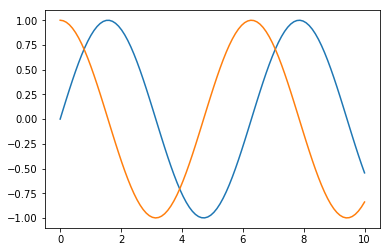

In [132]:
# If running a script, use plt.show() function as below
x = np.linspace(0, 10, 100) # What does linspace do?

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

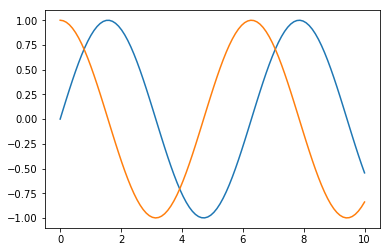

In [135]:
# The other way would be to use inline plotting (this is particular to Jupyter notebooks)
%matplotlib inline

# the same plots as before
myfig = plt.figure()
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

In [136]:
# Saving a figure
myfig.savefig('test.png')

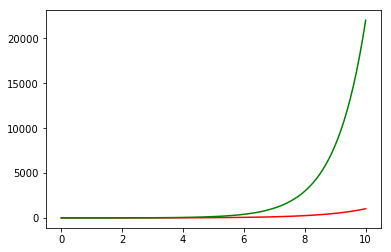

In [144]:
# Plotting in different colors
plt.plot(x, np.exp2(x), color='r')
plt.plot(x, np.exp(x), color='g')

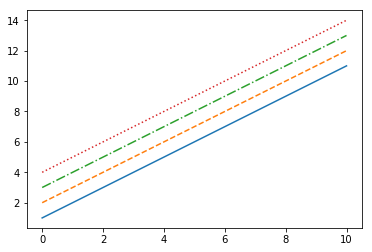

In [149]:
# Plotting in different lines styles
plt.plot(x, x + 1, linestyle='-')  # solid
plt.plot(x, x + 2, linestyle='--') # dashed
plt.plot(x, x + 3, linestyle='-.') # dashdot
plt.plot(x, x + 4, linestyle=':');  # dotted

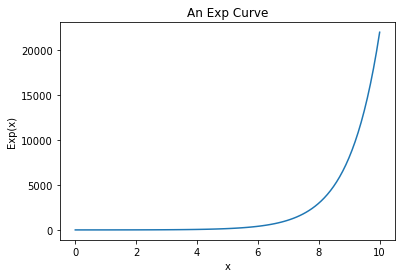

In [150]:
# Labeling plots
plt.plot(x, np.exp(x))
plt.title("An Exp Curve")
plt.xlabel("x")
plt.ylabel("Exp(x)");

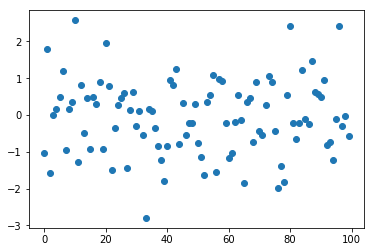

In [164]:
# Scatterplots and Histograms
data = np.random.randn(100)
plt.plot(np.arange(100),data, 'o')

(array([  1.,   4.,   9.,  15.,  19.,  18.,  22.,   7.,   2.,   3.]),
 array([-2.79576017, -2.25855718, -1.72135419, -1.1841512 , -0.64694821,
        -0.10974521,  0.42745778,  0.96466077,  1.50186376,  2.03906675,
         2.57626974]),
 <a list of 10 Patch objects>)

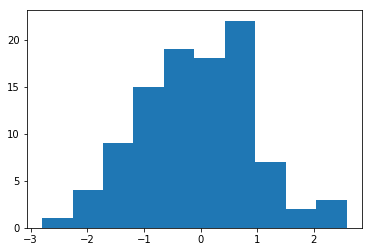

In [165]:
plt.hist(data)

Add the appropriate labels and titles to the scatterplot and histograms above and save each of the figures.